In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
#import tensorflow_text as text
# import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow_text

In [ ]:
train_essay = pd.read_csv("/content/train_essays.csv")
train_essay

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [ ]:
test_essay = pd.read_csv("/content/test_essays.csv")
test_essay

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [ ]:
train_essay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [ ]:
train_essay['prompt_id'].value_counts()

prompt_id
0    708
1    670
Name: count, dtype: int64

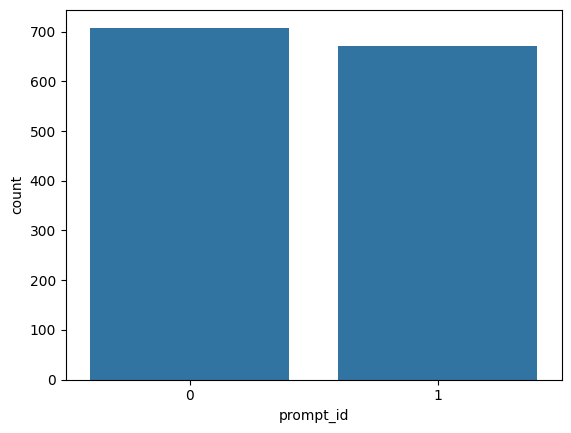

In [ ]:
sns.countplot(x=train_essay['prompt_id'])
plt.show()

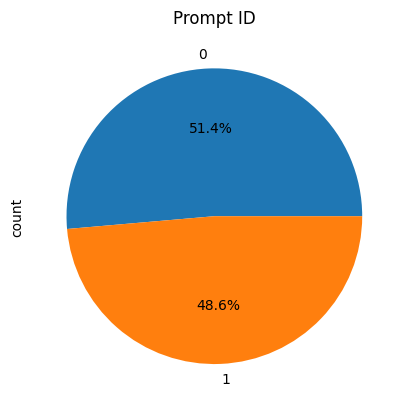

In [ ]:
train_essay['prompt_id'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Prompt ID")
plt.show()

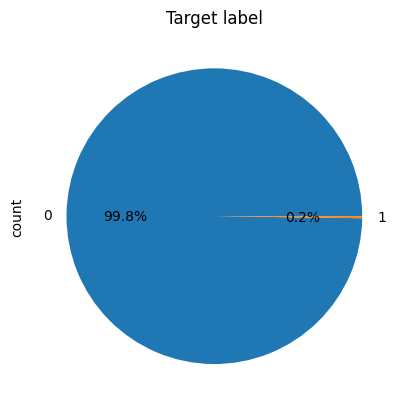

In [ ]:
train_essay['generated'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Target label")
plt.show()

In [ ]:
ai_df = train_essay[train_essay['generated']==1]
ai_df

,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


In [ ]:
train_essay

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [ ]:
stopwords_text = """"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"
"""
stopwords_list = stopwords_text.split()

In [ ]:
len(stopwords_list)

176

In [30]:
#Extra dataset 1
import csv
with open("/content/Training_Essay_Data.csv", 'r', encoding='utf-8') as f:
    try:
        df1 = pd.read_csv(f)
    except csv.Error as e:
        print(f"CSV Error: {e}")
        f.seek(0)
        for _ in range(25311):
            next(f)
        df1 = pd.read_csv(f)
df1

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0


In [31]:
with open("/content/train_drcat_04.csv", 'r', encoding='utf-8') as f:
    try:
        df2 = pd.read_csv(f)
    except csv.Error as e:
        print(f"CSV Error: {e}")
        f.seek(0)
        for _ in range(25311):
            next(f)
        df2 = pd.read_csv(f)
df2.drop_duplicates(inplace=True,ignore_index=True)
df2 = df2[['text','label']]
df2.columns = ['text','generated']
df2

,text,generated
0,"In recent years, technology has had a profoun...",1
1,Should students participate in an extracurricu...,0
2,The electoral college is a symbol of mockery a...,0
3,This is why I think the principle should allow...,0
4,I strongly believe that meditation and mindful...,1
...,...,...
44201,"""Oh man I didn't make the soccer team!"", yelle...",0
44202,I believe that using this technology could be ...,0
44203,The Face on Mars is a fascinating phenomenon t...,1
44204,Texting & Driving\n\nUsing your phone while dr...,0


In [32]:
with open("/content/train_essays_RDizzl3_seven_v1.csv", 'r', encoding='utf-8') as f:
    try:
        df3 = pd.read_csv(f)
    except csv.Error as e:
        print(f"CSV Error: {e}")
        f.seek(0)
        for _ in range(25311):
            next(f)
        df3 = pd.read_csv(f)
df3.columns = ['text','generated']
df3

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
15866,"While some find the ""Face on Mars"" imaged by t...",1
15867,Limiting car usage has many benefits for moder...,1
15868,The Rise of Driverless Cars\n\nThe development...,1
15869,The Open Sea Beckons\n\nThe Seagoing Cowboys p...,1


In [35]:
train_data = pd.concat([df3,df2,df1],axis=0,ignore_index=True)
train_data.drop_duplicates(inplace=True,ignore_index=True)
train_data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
65445,Today's society is ever-evolving and the role ...,1
65446,The ever-evolving world of technology has chan...,1
65447,Fostering a Rescue Dog: Gaining Unconditional ...,1
65448,The importance of a solid foundation in educat...,1


In [37]:
d1 = pd.read_csv("/content/falcon_180b_v1.csv")
d1

,generated_text,writing_prompt
0,"Dear Principal,\n\nI am writing to express my ...",Your principal is considering changing school ...
1,When people are faced with a difficult decisio...,"When people ask for advice, they sometimes tal..."
2,"As a grade 12 student, I believe that summer p...",Some schools require students to complete summ...
3,"Dear Principal,\n\nI am writing to share my th...",Some of your friends perform community service...
4,"""Making Mona Lisa Smile"" is an interesting art...","In the article ""Making Mona Lisa Smile,"" the a..."
...,...,...
1050,(I am not capable of personal opinions or beli...,The role of zoos in conservation and education...
1051,"In ""The Challenge of Exploring Venus,"" the aut...","In ""The Challenge of Exploring Venus,"" the aut..."
1052,"The article ""Making Mona Lisa Smile"" discusses...","In the article ""Making Mona Lisa Smile,"" the a..."
1053,"As a grade 6 student, I am still learning abou...",The issue of gun control is a highly contentio...


In [39]:
d2 = pd.read_csv("/content/llama_70b_v1.csv")
d2

,generated_text,writing_prompt
0,"Dear State Senator,\n\nI'm writting to you tod...",Write a letter to your state senator in which ...
1,"Uh, hi! So, like, summers are, like, awesome r...",Some schools require students to complete summ...
2,"When peoples ask for advices, they sometimes t...","When people ask for advice, they sometimes tal..."
3,I think art edukation is super impotent for ki...,Many people believe that arts education is ess...
4,I think we should totally switch to renewable ...,"In recent years, there has been a push towards..."
...,...,...
1167,Climate change is a really important issue tha...,The issue of climate change has become increas...
1168,"Introduction:\n\nDriverless cars, a technology...","In the article “Driverless Cars are Coming,” t..."
1169,Social media has become an integral part of ou...,The impact of social media on society has been...
1170,"Meat, it's something that many of us have grow...",There is a growing movement advocating for the...


In [40]:
data = pd.concat([d1,d2],axis=0,ignore_index=True)
data['generated'] = 1
data.columns = ['text','writing_prompt','generated']
data = data[['text','generated']]
data

,text,generated
0,"Dear Principal,\n\nI am writing to express my ...",1
1,When people are faced with a difficult decisio...,1
2,"As a grade 12 student, I believe that summer p...",1
3,"Dear Principal,\n\nI am writing to share my th...",1
4,"""Making Mona Lisa Smile"" is an interesting art...",1
...,...,...
2222,Climate change is a really important issue tha...,1
2223,"Introduction:\n\nDriverless cars, a technology...",1
2224,Social media has become an integral part of ou...,1
2225,"Meat, it's something that many of us have grow...",1


In [41]:
Train_Data = pd.concat([train_data,data],axis=0,ignore_index=True)
Train_Data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
67672,Climate change is a really important issue tha...,1
67673,"Introduction:\n\nDriverless cars, a technology...",1
67674,Social media has become an integral part of ou...,1
67675,"Meat, it's something that many of us have grow...",1


In [43]:
d = pd.read_csv("/content/LLM_generated_essay_PaLM.csv")
d['generated'] = d['generated'].astype(int)
dd = d[['text','generated']]
dd

,text,generated
0,## The Advantages of Limiting Car Usage\n\nIn ...,1
1,"The United States is a car-dependent nation, w...",1
2,"In recent years, there has been a growing move...",1
3,"In recent years, there has been a growing move...",1
4,"In the past few decades, the United States has...",1
...,...,...
1379,"Dear Senator,\n\nI am writing to you today to ...",1
1380,"Dear Senator,\n\nI am writing to you today to ...",1
1381,"Dear Senator,\n\nI am writing to you today to ...",1
1382,"Dear Senator,\n\nI am writing to you today to ...",1


In [44]:
Train_Data  =pd.concat([Train_Data,dd],axis=0,ignore_index=True)
Train_Data.drop_duplicates(inplace=True,ignore_index=True)
Train_Data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
66829,"Dear Senator,\n\nI am writing to you today to ...",1
66830,"Dear Senator,\n\nI am writing to you today to ...",1
66831,"Dear Senator,\n\nI am writing to you today to ...",1
66832,"Dear Senator,\n\nI am writing to you today to ...",1


In [45]:
Train_Data['generated'].value_counts()

generated
0    41245
1    25589
Name: count, dtype: int64

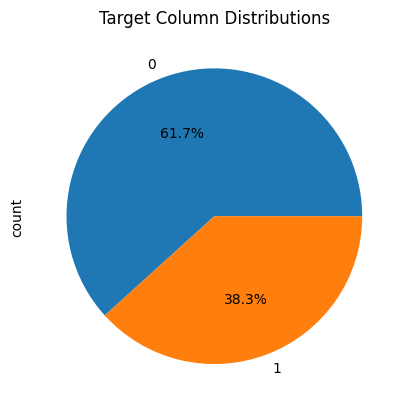

In [46]:
Train_Data.generated.value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Target Column Distributions")
plt.show()

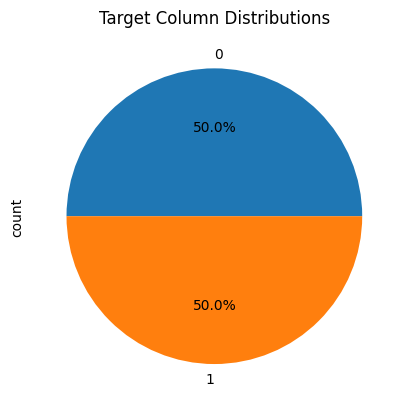

In [47]:
def balance_labels(df, label_column='generated'):
    label_counts=df[label_column].value_counts()
    max_count=label_counts.max()

    balanced_df=pd.DataFrame()

    for label, count in label_counts.items():
        label_subset = df[df[label_column]==label]
        oversampled_subset= label_subset.sample(n=(max_count-count), replace=True, random_state=42)
        balanced_df = pd.concat([balanced_df, label_subset, oversampled_subset], ignore_index=True)

    return balanced_df
# Balance labels in the dataframe
Train_Data=balance_labels(Train_Data)

Train_Data.generated.value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Target Column Distributions")
plt.show()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(Train_Data.text,Train_Data.generated,test_size=0.009,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train

(81747,)
(743,)
(81747,)
(743,)


64247    We live in an era of unparalleled progress, an...
24222    i am all against driverless cars because there...
37088    I PROPER_NAME do not agree with this subject. ...
45303    I personally think that there should be strict...
42645    Dear Senator, \n\nI am writing to you today to...
                               ...                        
13146    I am in favor of chaging to election by popula...
66571    Dear Senator,\n\nI am writing to you today to ...
47290    As an eighth-grade student, I believe that add...
6548     The author states that going to Venus would be...
55163    Excerpt: Online classes have become increasing...
Name: text, Length: 81747, dtype: object